### Pretrained model ###

Basic models
These are models with simple architectures to get you up and running with confidence. They tend to have fewer layers, and allow for quick iterations on preprocessing and training options. Once you have a handle on how you want to train your model, you can move to the next section to see if you can improve your results.

 

Start here: GoogLeNet, VGG-16, VGG-19, and AlexNet<br>
best:GoogleNet<br>
<b>GoogLeNet</b> is a type of convolutional neural network based on the Inception architecture. It utilises Inception modules, which allow the network to choose between multiple convolutional filter sizes in each block. An Inception network stacks these modules on top of each other, with occasional max-pooling layers with stride 2 to halve the resolution of the grid.<br>
GoogLeNet is a 22-layer deep convolutional neural network that’s a variant of the Inception Network, a Deep Convolutional Neural Network developed by researchers at Google.

The GoogLeNet architecture presented in the ImageNet Large-Scale Visual Recognition Challenge 2014(ILSVRC14) solved computer vision tasks such as image classification and object detection
Today GoogLeNet is used for other computer vision tasks such as face detection and recognition, adversarial training etc.
It has provided a significant decrease in error rate as compared to previous winners AlexNet (Winner of ILSVRC 2012) and ZF-Net (Winner of ILSVRC 2013) and significantly less error rate than VGG (2014 runner up). 
This architecture uses techniques such as 1×1 convolutions in the middle of the architecture and global average pooling.
Features of GoogleNet:

The GoogLeNet architecture is very different from previous state-of-the-art architectures such as AlexNet and ZF-Net. It uses many different kinds of methods such as 1×1 convolution and global average pooling that enables it to create deeper architecture. 
1×1 convolution : The inception architecture uses 1×1 convolution in its architecture. These convolutions used to decrease the number of parameters (weights and biases) of the architecture. By reducing the parameters we also increase the depth of the architecture. 
Global Average Pooling :
In the previous architecture such as AlexNet, the fully connected layers are used at the end of the network. These fully connected layers contain the majority of parameters of many architectures that causes an increase in computation cost.
In GoogLeNet architecture, there is a method called global average pooling is used at the end of the network. This layer takes a feature map of 7×7 and averages it to 1×1. This also decreases the number of trainable parameters to 0 and improves the top-1 accuracy by 0.6%

Inception Module:
The inception module is different from previous architectures such as AlexNet, ZF-Net. In this architecture, there is a fixed convolution size for each layer.
In the Inception module 1×1, 3×3, 5×5 convolution and 3×3 max pooling performed in a parallel way at the input and the output of these are stacked together to generated final output. The idea behind that convolution filters of different sizes will handle objects at multiple scale better.
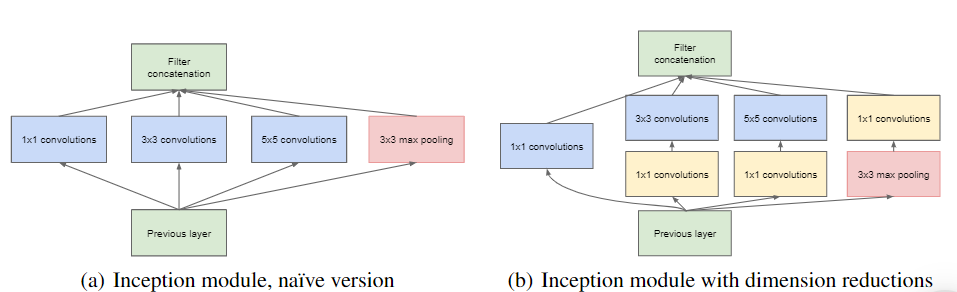
Auxiliary Classifier for Training:
Inception architecture used some intermediate classifier branches in the middle of the architecture, these branches are used during training only. These branches consist of a 5×5 average pooling layer with a stride of 3, a 1×1 convolutions with 128 filters, two fully connected layers of 1024 outputs and 1000 outputs and a softmax classification layer. The generated loss of these layers added to total loss with a weight of 0.3. These layers help in combating gradient vanishing problem and also provide regularization.

GoogLeNet was the winner at ILSRVRC 2014 taking 1st place in both classification an detection task. It has top-5 error rate of 6.67% in classification task. An ensemble of 6 GoogLeNets gives 43.9 % mAP on ImageNet test set.

source
<hr>

<b>Inception Network</b>
An inception network is a deep neural network with an architectural design that consists of repeating components referred to as Inception modules.

Higher-accuracy models
These models cover your image-based workflows, such as image classification, object detection, and semantic segmentation. Most networks, including the basic models above, fall into this category. The difference from basic models is that higher-accuracy models may require more training time and have a more complicated network structure.

Start here: ResNet-50, Inception-v3, Densenet-201, Xception

 

Object detection workflows. DarkNet-19 and DarkNet-53 are often recommended as the foundation for detection and YOLO type workflows. I’ve also seen ResNet-50 used with Faster R-CNN, so there’s some flexibility here too. 

Semantic segmentation. You can take a network and turn it into a semantic segmentation network. There are also specific Segnet structures, such as segnetLayers and unetLayers.

ResNet50 is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer. It has 3.8 x 10^9 Floating points operations. It is a widely used ResNet model
<hr>

Models for Edge Deployment
When moving to hardware, model size can become increasingly important. These models are intended to have a low-memory footprint, for embedded devices like Raspberry Pi™.



Start here: SqueezeNet, MobileNet-v2, ShuffLeNet, NASNetMobile
<hr>

How do you know you’ve chosen the right model?
There may not be one right choice for your task. You’ll know you have an acceptable model when it performs accurately for your given task. What level of accuracy you consider acceptable can vary considerably by application. Think about the difference between an incorrect suggestion from Google when shopping and a missed blizzard warning.

 

Trying out a variety of pretrained networks for your application is key to ensure you get to the most accurate and robust model. And of course, network architecture is only one of many dials you need to turn for a successful outcome.

The intuition for using pretrained models
Now think about this. If you want to train a classifier, any classifier, the initial layers are going to detect slant lines no matter what you want to classify. Hence, it does not make sense to train them every time you create a neural network.

It is only the final layers of our network, the layers that learn to identify classes specific to your project that need training.
pretrained models are usually trained on large amounts of data and using resources that aren’t usually available to everyone

Fine tuining models

Sources:https://explore.mathworks.com/all-about-pretrained-models <br>
** https://towardsdatascience.com/how-do-pretrained-models-work-11fe2f64eaa2<br>
https://www.geeksforgeeks.org/understanding-googlenet-model-cnn-architecture/


12/9/2022

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), 

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
!docker pull tensorflow/tensorflow:latest  # Download latest stable image


'docker' is not recognized as an internal or external command,
operable program or batch file.


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 455.9/455.9 MB 673.4 kB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 817.5 kB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 1.0 MB/s eta 0:00:00
     ------------------------------------ 895.5/895.5 kB 578.2 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 865.5 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 923.9 kB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 kB 830.3 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 999.7 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 835.7 kB/s eta 0:00:00
     -------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
